# Wheelchair Control

![](images/wheelchair.jpg)

### Python Dependencies

In [7]:
from numpy import *
from numpy.linalg import *

from scipy.linalg import *
from scipy.integrate import *
from scipy.signal import *

from matplotlib.pyplot import *

Step 1 - Wheelchair Planar Model
================================

### Introduction

We consider a simple model of a wheelchair evolving in the plane. It is mainly made of

  - A frame ; from above, its most visible component is the seat. We assume that it is a square,

  - Two fixed wheels (their orientation with respect to the frame does not change). 
    They are parallel and located at opposite ends of the seat. 
    
We assume that the seat backrest is on top of the wheels common axis.


Let $(0, e_x, e_y)$ be a direct orthonormal frame of the plane. We denote 

  - $(x, y)$ the coordinates of the wheel axis center in the orthonormal and 
  - $\theta$ the angle of the wheels direction with respect to vector $e_x$ ; with $\theta = 0$ when the front of the wheelchait faces the right ($e_x$) and $\theta = \pi/2$ when it faces upwards ($e_y$).

  - $\phi_l$ and $\phi_r$ the rotation angles of the left and right wheel respectively ; by convention, when these angles increase, the wheelchair moves forward.

### Parameter Definition

From now on, we assume that the seat side length is $L = 50 \mbox{ cm}$ and the wheel radius is $R_w = 30 \mbox{ cm}$.

🧩 Define the corresponding Python variables `L` and `Rw` (express every length in meters, and more generally in the sequel, always use the [international standard of units](https://en.wikipedia.org/wiki/SI_derived_unit)) for numerical values. 

In [8]:
L = 0.5
Rw = 0.3

### Graphical Representation

🧩 Implement a function `draw_wheelchair` with arguments `x`, `y` and `theta` that draws a simple geometric model of the wheelchair (with seat and fixed wheels) in the plane (top view) for arbitrary values of $(x, y)$ and $\theta$. 

🗝️ **Hint.** Use the function `plot` of `matplotlib.pyplot`.

In [9]:
def draw_wheelchair(x, y, theta):
    offset = 0.02
    #les points pour theta = 0
    points = array([(x-Rw/2, y-L/2-offset), (x+Rw/2, y-L/2-offset), (x, y-L/2-offset), (x, y+L/2+offset),
             (x-Rw/2, y+L/2+offset),(x+Rw/2, y+L/2+offset), (x, y+L/2+offset),
              (x, y+L/2), (x+L, y+L/2), (x+L, y-L/2), (x, y-L/2)])
    #rotation
    for index, point in enumerate(points):
        z = complex(point[0], point[1])
        center = complex(x, y)
        z_prime = complex(cos(theta), sin(theta))*(z-center)+center
        new_x, new_y = z_prime.real, z_prime.imag
        points[index][0] = new_x
        points[index][1] = new_y
    plot(points[:, 0], points[:, 1], color="black")

🧩 Represent the wheelchair when $(x, y, \theta) = (0, 0, 0), (2, 2, \pi/2), (0, 4, \pi), (-2, 2, 3\pi/2)$.

🗝️ **Hint.** Use the following `draw_arena` function beforehand.

In [10]:
def draw_arena(xmin, xmax, ymin, ymax):
    wh_ratio = (xmax - xmin) / (ymax - ymin)
    figsize = fig_width, fig_height = 16, 16 / wh_ratio
    figure(figsize=figsize)
    axes = gca()
    axes.axis([xmin, xmax, ymin, ymax])
    axes.set_aspect(1)
    xticks(arange(xmin, xmax+1, 1))
    yticks(arange(ymin, ymax+1, 1))
    grid(True)

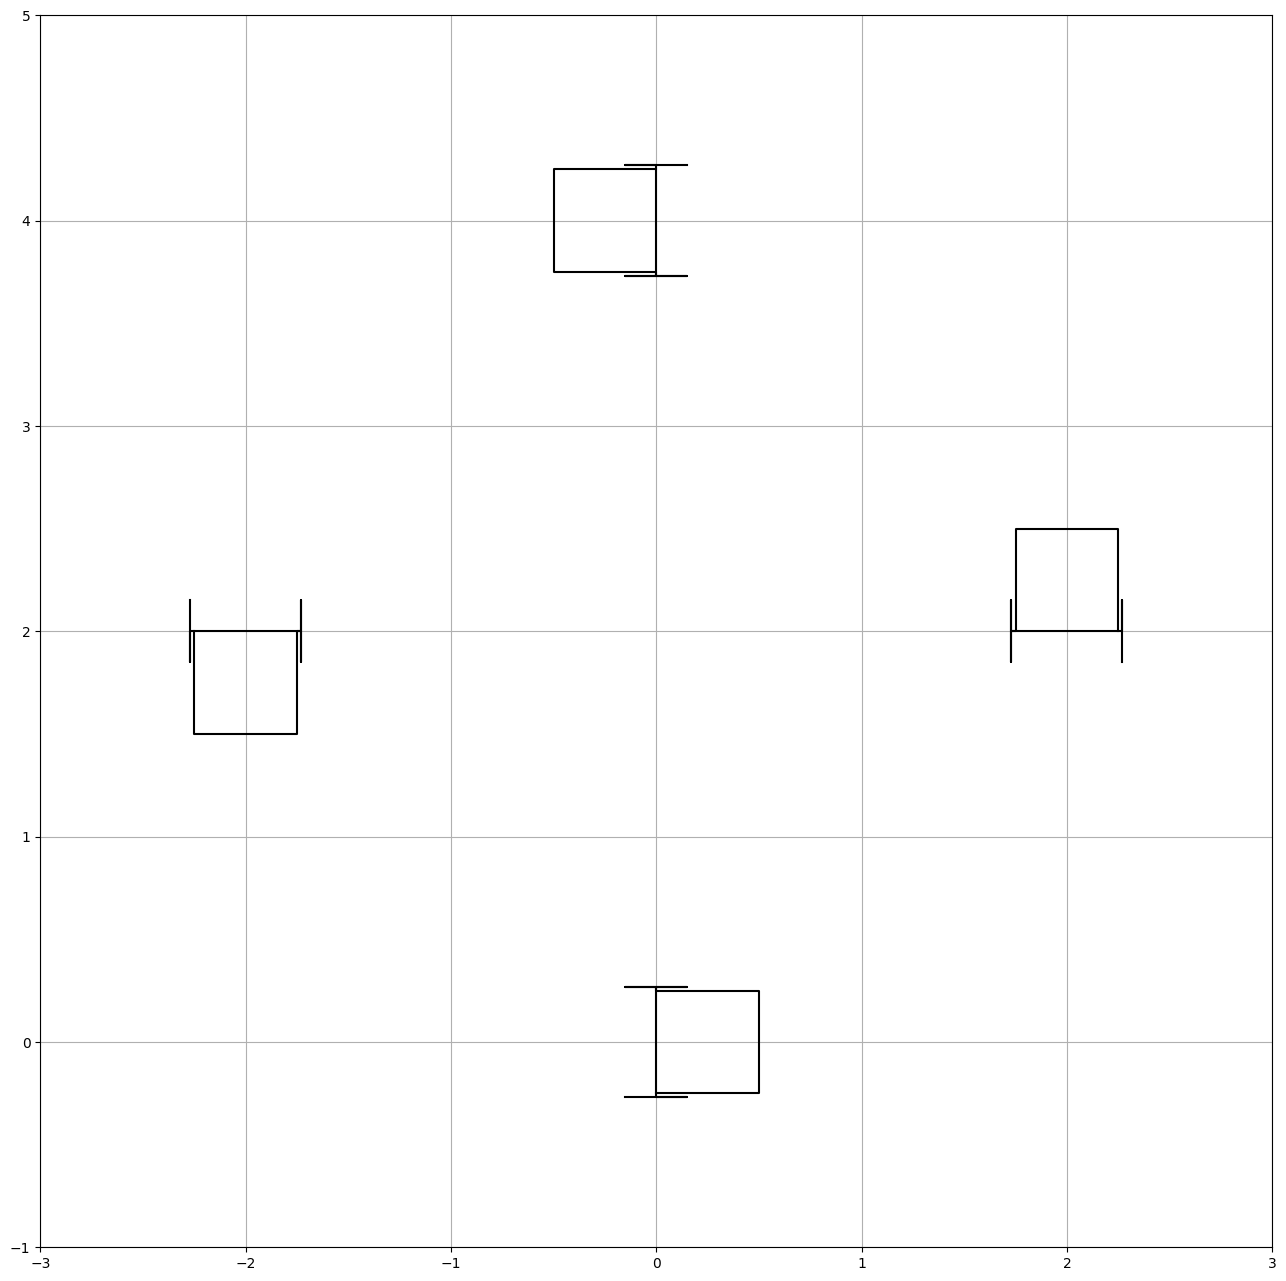

In [27]:
draw_arena(-3, 3, -1, 5)
draw_wheelchair(0, 0, 0)
draw_wheelchair(2, 2, pi/2)
draw_wheelchair(0, 4, pi)
draw_wheelchair(-2, 2, 3*pi/2)

### Kinematic Modeling

We assume that we can control the wheels angular velocities $\omega_l = \dot{\phi}_l$ and $\omega_r = \dot{\phi}_r$ (this is a *kinematic* model of the wheelchair).
We also assume that the wheelchair fixed wheels roll without slipping. 

🧩 Establish the differential equations that relate $\dot{x}$,
$\dot{y}$ and $\dot{\theta}$ with $\omega_l$ and $\omega_r$.

**Answer:** \
The differential equations are:\
$\dot{x} = R_w\frac{(\omega_l+\omega_r)}{2}cos(\theta)$\
$\dot{y} = R_w\frac{(\omega_l+\omega_r)}{2}sin(\theta)$\
$\dot{\theta} = \frac{R_w}{L}(\omega_r-\omega_l)$

<span style="color:red">**Explications ?**</span>

### Analysis

🧩 Show that if $\omega_l$ and $\omega_r$ are continuously differentiable functions of $(x, y, \theta)$ (which includes the case of constant inputs), this system is well-posed.

**Answer:** \
We pose :$ f(x,y,\theta) = (R_w\frac{(\omega_l+\omega_r)}{2}cos(\theta),R_w\frac{(\omega_l+\omega_r)}{2}sin(\theta),\frac{R_w}{L}(\omega_r-\omega_l))$ \
Therefore, the Jacobian matrix is:
$
\text{}
$$ \frac{\partial f}{\partial (x,y,\theta)} = \begin{bmatrix}
0 & 0 & -R_w\frac{(\omega_l+\omega_r)}{2}\sin(\theta) \\
0 & 0 & R_w\frac{(\omega_l+\omega_r)}{2}\cos(\theta) \\
0 & 0 & 0 \\
\end{bmatrix} 
$

We have the jacobian matrix is defined and continous because $cos(\theta)$ and $sin(\theta)$ are continous, then the system is well imposed.


🧩 Show that if $\omega_l$ and $\omega_r$ are constants, the maximal solution associated to any initial state is global. Is is still true of $\omega_l$ and $\omega_r$ are arbitrary continuously differentiable functions of $(x, y, \theta)$ ?

**Answer:** \
If $w_l$ and $w_r$ are constants then : $\theta(t) = \theta_0 + \frac{R_w}{L}(\omega_r-\omega_l)*t$ \
By integrating we obtain x(t) and y(t) : \
$
x(t) = x_0 + \frac{L(\omega_l+\omega_r)}{2(\omega_r-\omega_l)}(sin(\theta_0+\frac{R_w}{L}(\omega_r-\omega_l)*t )-sin(\theta_0))
\\
y(t) = y_0 - \frac{L(\omega_l+\omega_r)}{2(\omega_r-\omega_l)}(cos(\theta_0+\frac{R_w}{L}(\omega_r-\omega_l)*t )-cos(\theta_0))
$
Then the golbal solution of the system is $(x_0 + \frac{L(\omega_l+\omega_r)}{2(\omega_r-\omega_l)}(sin(\theta_0+\frac{R_w}{L}(\omega_r-\omega_l)*t )-sin(\theta_0)) , y_0 - \frac{L(\omega_l+\omega_r)}{2(\omega_r-\omega_l)}(cos(\theta_0+\frac{R_w}{L}(\omega_r-\omega_l)*t )-cos(\theta_0)) ,\theta_0 + \frac{R_w}{L}(\omega_r-\omega_l)*t)
$


If we take : $w_l$ = $w_r$ = $\frac{1}{{(1-t)}^2}$ 
Then $ \theta(t) =  \theta_0 $ and by integration we obtain : $x(t) = -\frac{R_wcos(\theta_0)}{1-t}$
and $y(t) = -\frac{R_wsin(\theta_0)}{1-t}$ \
But x(t) and y(t) blow up in t = 1, therefore the maximal solution of the problem is not global.

<span style="color:red">**Pas d'accord. À vitesse constante, on peut montrer que la solution est bornée. Ce n'est par contre pas le cas avec un profil de vitesse quelconque**</span>

### Vector Field

In the sequel, `omega` is a function that computes the input vector $\omega := (\omega_l, \omega_r)$ given the time $t$ and $(x, y, \theta)$ (thus, it may depend on the time and/or on the system state if needed). For example:

In [29]:
def omega(t, xytheta):
    omega_l = (1 - L/4) * pi / Rw
    omega_r = (1 + L/4) * pi / Rw
    return array([omega_l, omega_r])

🧩 Implement a function `fun(t, xytheta)` that computes $(\dot{x}, \dot{y}, \dot{\theta})$ given the time $t$ and $(x,y,\theta)$ (and implicitly the inputs $\omega$ computed by the function `omega`).

In [30]:
def fun(t, xytheta):
    x, y, theta = xytheta
    omega_l, omega_r = tuple(omega(t, xytheta))
    x_point = Rw*cos(theta)*(omega_r+omega_l)/2
    y_point = Rw*sin(theta)*(omega_r+omega_l)/2
    theta_point = (omega_r-omega_l)*Rw/L
    return x_point, y_point, theta_point

### Simulation Setup

🧩 Simulate the wheelchair dynamics for 4 seconds when $(x_0, y_0, \theta_0)(t=0) = (0.0, 0.0, 0.0)$,
and the wheels velocities are the constants $\omega_l = (1 - L/4)  \pi / R \mbox{ rad/s}$ and $\omega_r = (1 + L/4)  \pi / R_w \mbox{ rad/s}$.
(Compute the dense outputs.)
   

In [59]:
initial_condition = [0.0, 0.0, 0.0]
time_range = [0.0, 4.0]
sol = solve_ivp(fun, time_range, initial_condition, dense_output=True)
t = np.arange(0.0, 4, 0.05)
results = sol.sol(t)

🧩 Use the simulation results to draw the graphs of $x(t)$, $y(t)$ and $\theta(t)$.

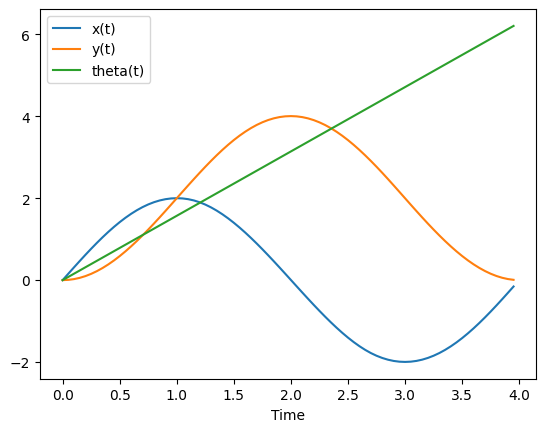

In [60]:
xlabel("Time")
plot(t, results[0], label="x(t)")
plot(t, results[1], label="y(t)")
plot(t, results[2], label="theta(t)")
legend()

🧩 Use the simulation results to display the robot location every 0.5 second.

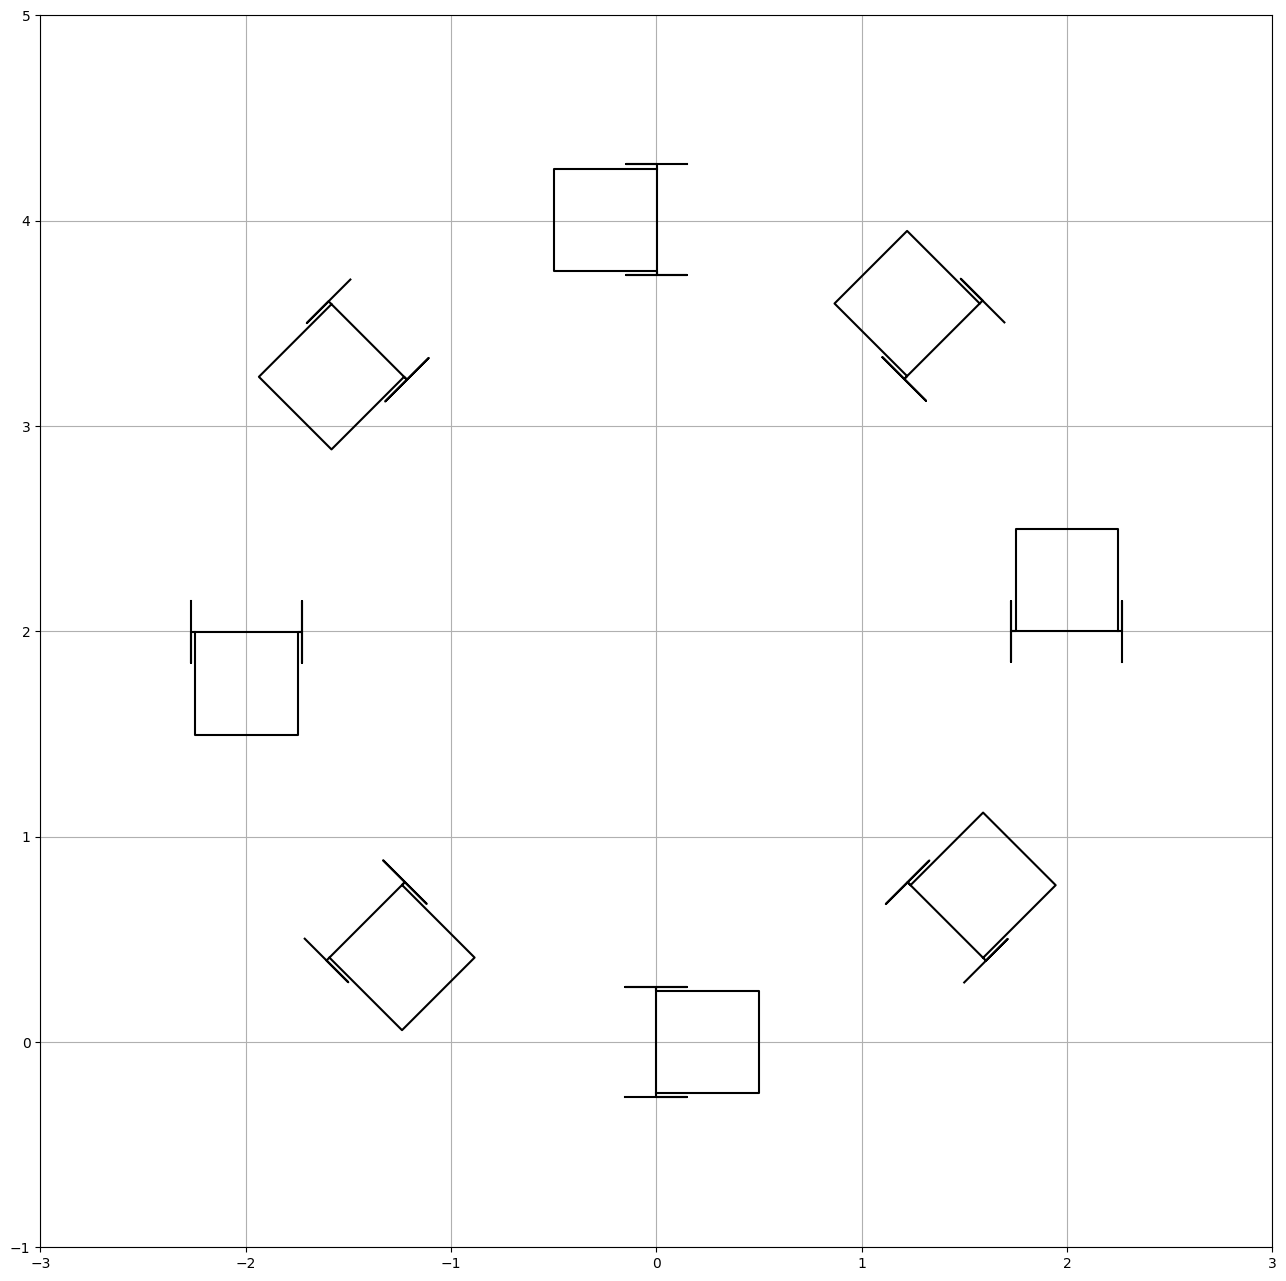

In [64]:
draw_arena(-3, 3, -1, 5)
for time in np.arange(0, 4, 0.5):
    index = where(t==time)[0][0]
    location = results[:, index]
    draw_wheelchair(*location)

🧩 What should be the analytical expression of $x(t)$, $y(t)$ and $\theta(t)$? 

**Answer:** \
$\text{We note : } \alpha =\frac{R_w}{L}(\omega_r-\omega_l) \text{ and } \beta = R_w\frac{(\omega_l+\omega_r)}{2}$\
$\text{By assuming that }  \omega_r \text{ and } \omega_l \text{ are constants, we integrate the differential equations, then we obtain :} $\
$x = \frac{\beta}{\alpha}sin(\alpha.t) $\
$y = \frac{\beta}{\alpha}(1-cos(\alpha.t)) $\
$\theta = \alpha.t $

🧩 Do you experimental results match the theoretical results ? Draw the curves of the simulation error at time $t$ for $x$, $y$ and $\theta$.

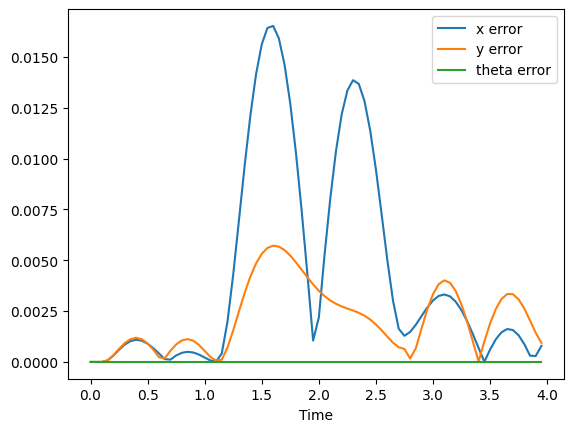

In [107]:
omega_l = (1 - L/4) * pi / Rw
omega_r = (1 + L/4) * pi / Rw
alpha = Rw*(omega_r-omega_l)/L
beta = Rw*(omega_r+omega_l)/2
theorical_x = beta*sin(alpha*t)/alpha
theorical_y = beta*(1-cos(alpha*t))/alpha
theorical_theta = alpha*t
x_error = abs(theorical_x-results[0])
y_error = abs(theorical_y-results[1])
theta_error = abs(theorical_theta-results[2])
plot(t, x_error, label="x error")
plot(t, y_error, label="y error")
plot(t, theta_error, label="theta error")
xlabel("Time")
legend()

We observe that the maximum error that we get in x and y is about $1.7 \times 10^{-2}$ while theta has an error of about $10^{-15}$, which allows us to conclude that experimental results match the theoretical results 

🧩 If needed, adjust the simulation parameters until this error is uniformly less than $2 \times 10^{-5}$ for every component of $(x, y, \theta)$.

In [110]:
pass